# Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
path_data = '../data/'

In [3]:
nodes = pd.read_csv(path_data + 'node_information.csv', header=None) # read data in
nodes.columns = ['id', 'year', 'title', 'authors', 'journal', 'abstract'] # change column names (for visibility)

In [4]:
nodes.head()

,id,year,title,authors,journal,abstract
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...


In [5]:
nodes.tail()

,id,year,title,authors,journal,abstract
27765,9912289,2002,gauge fixing in the chain by chain method,"A Shirzad, F Loran",NaN,in a recent work we showed that for a hamilton...
27766,9912290,2000,shuffling quantum field theory,Dirk Kreimer,Lett.Math.Phys.,we discuss shuffle identities between feynman ...
27767,9912291,1999,small object limit of casimir effect and the s...,"O. Kenneth, S. Nussinov",Phys.Rev.,we show a simple way of deriving the casimir p...
27768,9912292,1999,1 4 pbgs and superparticle actions,"F.Delduc, E. Ivanov, S. Krivonos",NaN,karpacz poland september 21-25 1999 we constru...
27769,9912293,2000,corrections to the abelian born-infeld action ...,L. Cornalba (I.H.E.S.),JHEP,noncommutative geometry in a recent paper seib...


In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27770 entries, 0 to 27769
Data columns (total 6 columns):
id          27770 non-null int64
year        27770 non-null int64
title       27770 non-null object
authors     23737 non-null object
journal     20298 non-null object
abstract    27770 non-null object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
nodes = nodes.fillna(0.0) # replace all missing values by 0.0

## Journal titles

In [8]:
journals, counts = np.unique(nodes['journal'].astype(str), return_counts=True) # extract the unique journal titles and its counts
idx = np.argsort(-counts) # sort by decreasing number
journals, counts = journals[idx], counts[idx]

print('Total number of journals: %d' % len(journals))

# get the 10 journals that most papers are published in
for i in range(10):
    print ('\t%s : %d' % (journals[i], counts[i]))

Total number of journals: 285
	0.0 : 7472
	Phys.Lett. : 3575
	Nucl.Phys. : 3571
	Phys.Rev. : 3170
	JHEP : 1957
	Int.J.Mod.Phys. : 938
	Mod.Phys.Lett. : 936
	Class.Quant.Grav. : 556
	J.Phys. : 536
	J.Math.Phys. : 532


From the result, we can see many articles are recorded with unknown journal in which they are published (either they are not yet published, either the data is missing). It appears that all the papers are published in journals that are related to physics (**Phys**).

[]

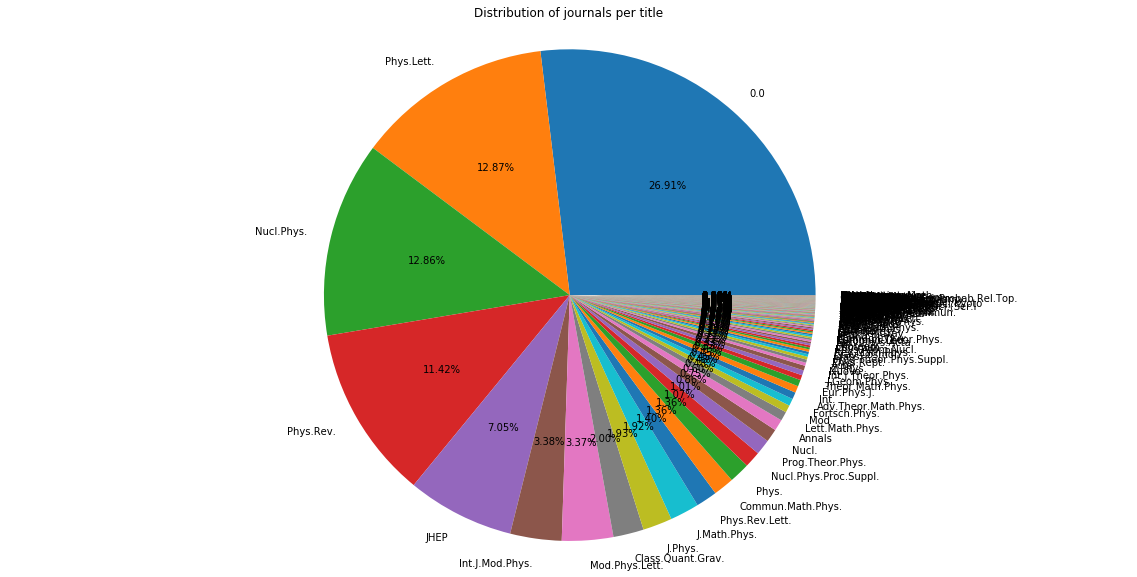

In [9]:
fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title')
ax.pie(counts, labels=journals, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The previous pie chart is not visible, because there are too many "noises" (journals that only appear less than t times). We try to plot a more visible plot, by "crashing" all journals that appear less than a threshold (e.g. t = 100) into an arbitrary category named "misc".

[]

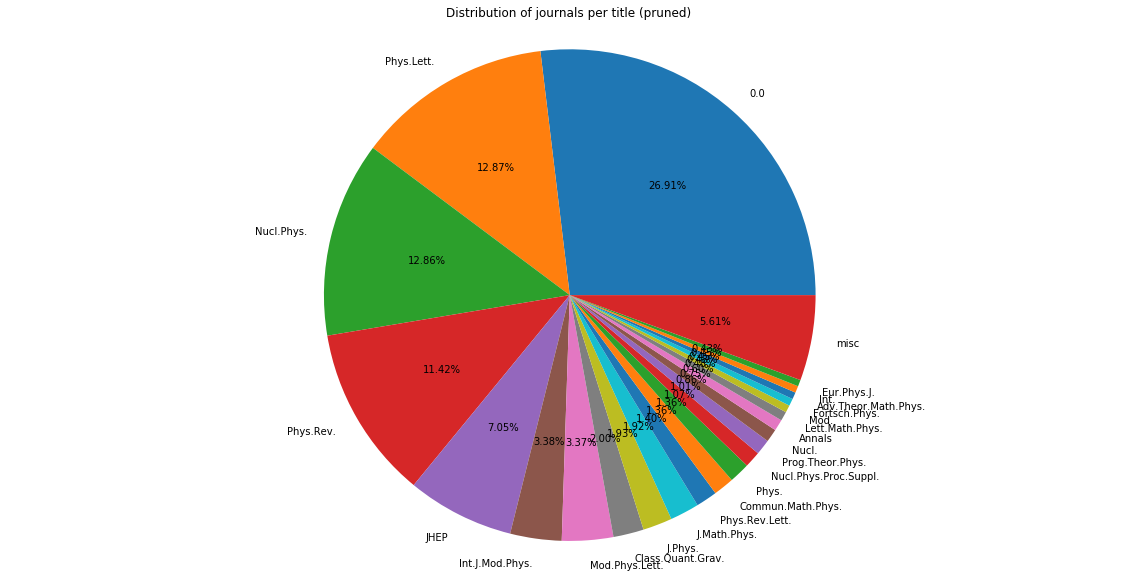

In [10]:
idx_pruned = counts > 100 # get the indices of journals that surpass the threhold t = 100
journals_pr = np.append(journals[idx_pruned], 'misc') # journals that appear less than 100 times are grouped into "misc"
counts_pr = np.append(counts[idx_pruned], sum(counts[~idx_pruned])) # sum up the counts of all articles that appear less than 100 times

fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title (pruned)')
ax.pie(counts_pr, labels=journals_pr, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The new plot is now less "noisy" and more visible, as all the infrequent journals are grouped into **misc**. As observed from the pie, more than 25% of the total articles have missing information about the journal, "Phys.Lett", "Nucl.Phys." and "Phys.Rev" have almost equal size.

### Numbers of authors per article

In this part, we try to extract the number of authors of each article and append the analysis to the augmented dataframe.

In [11]:
nodes_aug = nodes # dataframes of all the articles, augmented by analysis result

In [12]:
# count the number of authors per article, then add the information to the dataframe
nb_authors = np.zeros(len(nodes_aug))
i = 0
for authors in nodes_aug['authors']:
    if authors != 0.0:
        authors = [a for a in authors.split(',')] # split by ','
        nb_authors[i] = len(authors)
        i += 1
nodes_aug['nb_authors'] = nb_authors.astype(int) # add the column 'nb_authors' to the dataframe

In [13]:
nodes_aug.head(10)

,id,year,title,authors,journal,abstract,nb_authors
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,0,these are notes based on lectures given at tas...,1
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,3
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",0,recently ivanov and volovich hep-th 9912242 cl...,2
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,1
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",0,proceedings of lie iii clausthal july 1999 var...,2
5,1006,2000,questions in quantum physics,Rudolf Haag,0,an assessment of the present status of the the...,1
6,1007,2000,topological defects in 3-d euclidean gravity,"Sheng Li, Yong Zhang, Zhongyuan Zhu",0,by making use of the complete decomposition of...,3
7,1008,2000,n 0 supersymmetry and the non-relativistic mon...,Donald Spector,Phys.Lett.,we study some of the algebraic properties of t...,1
8,1009,2000,gluon pair production from space-time dependen...,"Gouranga C. Nayak, Walter Greiner",0,we compute the probabilty for the processes a ...,2
9,1010,2000,instantons euclidean supersymmetry and wick ro...,"A.V. Belitsky, S. V, oren, P. van Nieuwenhuizen",Phys.Lett.,we discuss the reality properties of the fermi...,4


## Publication per year

In [14]:
papers_per_year = np.array(nodes['year'])

In [15]:
years, counts = np.unique(papers_per_year, return_counts=True)

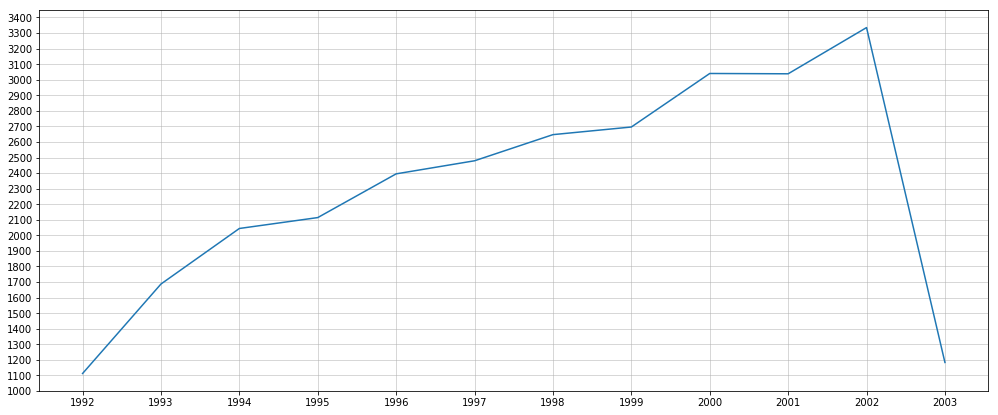

In [16]:
fig, ax = plt.subplots(figsize=(17,7))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot(years, counts)

In [17]:
papers = zip(years,counts)

## Famous authors

In [36]:
group_authors = np.array(nodes['authors'])
authors = []
for group in group_authors:
    if group != 0.0:
        authors += [a.strip() for a in group.split(',')]
print('Individual authors: %d' % len(authors))

Individual authors: 53662


In [19]:
unique_authors, counts = np.unique(authors, return_counts=True)
idx = np.argsort(-counts)
unique_authors, counts =  unique_authors[idx], counts[idx]

In [22]:
for i in range(len(counts)):
    print('%s has publised %d articles' % (unique_authors[i], counts[i]))

 has publised 1117 articles
Alex has publised 196 articles
C.N. Pope has publised 125 articles
H. Lu has publised 123 articles
A.A. Tseytlin has publised 84 articles
t has publised 83 articles
Shin'ichi Nojiri has publised 79 articles
Sergei D. Odintsov has publised 75 articles
E. Elizalde has publised 74 articles
Cumrun Vafa has publised 73 articles
Edward Witten has publised 72 articles
S.D. Odintsov has publised 69 articles
Renata Kallosh has publised 67 articles
S. Ferrara has publised 67 articles
Ashok Das has publised 64 articles
M. Cvetic has publised 56 articles
E. Sezgin has publised 54 articles
Burt A. Ovrut has publised 54 articles
Ian I. Kogan has publised 52 articles
Mirjam Cvetic has publised 51 articles
Barton Zwiebach has publised 50 articles
I. Antoniadis has publised 49 articles
Gregory Moore has publised 49 articles
P.K. Townsend has publised 48 articles
Robert C. Myers has publised 47 articles
E. Bergshoeff has publised 47 articles
Amihay Hanany has publised 46 arti

J. Plefka has publised 6 articles
Boris Feigin has publised 6 articles
J. Phillips has publised 6 articles
Shinichi Deguchi has publised 6 articles
Akira Kokado has publised 6 articles
Boguslaw Broda has publised 6 articles
M. Marino has publised 6 articles
J. Lukierski (Wroclaw Univ.) has publised 6 articles
J. Lukierski has publised 6 articles
M. Moriconi has publised 6 articles
M. Yu has publised 6 articles
Luis Alvarez-Gaume has publised 6 articles
M.A. De Andrade has publised 6 articles
Mario Trigiante has publised 6 articles
Christian Brouder has publised 6 articles
Christian Grosche has publised 6 articles
Badis Ydri has publised 6 articles
L.P. Colatto has publised 6 articles
Marta Gomez-Reino has publised 6 articles
Hisao Suzuki has publised 6 articles
S.D.Odintsov has publised 6 articles
Martin O'Loughlin has publised 6 articles
Martin Schaden has publised 6 articles
Hiroshige Kajiura has publised 6 articles
Martin Schmaltz has publised 6 articles
Hiroshi Suzuki (Ibaraki Univ

E. Batista has publised 4 articles
R. Soldati has publised 4 articles
R. Sollacher has publised 4 articles
R. Wimmer has publised 4 articles
E. A. Bergshoeff has publised 4 articles
E. has publised 4 articles
K. Peeters has publised 4 articles
Universidad has publised 4 articles
E. I. Buchbinder has publised 4 articles
Rajsekhar Bhattacharyya has publised 4 articles
Raoul Santachiara has publised 4 articles
K.-W. Xu has publised 4 articles
David B. Kaplan has publised 4 articles
David B. Fairlie has publised 4 articles
K.B. Alkalaev has publised 4 articles
Kai-Ming Lee has publised 4 articles
Robert C. has publised 4 articles
Robert J. Perry has publised 4 articles
K.Zarembo has publised 4 articles
K.E. Kunze has publised 4 articles
Takehisa Fujita has publised 4 articles
Sean J. Yoon has publised 4 articles
Daniel H.T. Franco has publised 4 articles
K.E. Osetrin has publised 4 articles
shoff has publised 4 articles
UCSB) has publised 4 articles
Daniel Arnaudon has publised 4 articles


Shimon has publised 3 articles
Tsou Sheung Tsun has publised 3 articles
Hitoshi Murayama (UC Berkeley has publised 3 articles
Tsukasa Tada has publised 3 articles
Joel S. Rozowsky has publised 3 articles
Hitoshi Murayama has publised 3 articles
Hitoshi Konno has publised 3 articles
U. Moschella has publised 3 articles
Samuli Hemming has publised 3 articles
Hirofumi Yasuta (Ibaraki University) has publised 3 articles
Hiroaki Terashima (Univ. of Tokyo) has publised 3 articles
Jun-Ichi Sumi has publised 3 articles
Christopher Hull has publised 3 articles
C. Teitelboim has publised 3 articles
Satoshi Nagaoka has publised 3 articles
Ulf Lindstr\"om has publised 3 articles
Harold Widom has publised 3 articles
A.P.C.Malbouisson has publised 3 articles
Jutta Kunz (2) ((1) NUI Maynooth has publised 3 articles
Harlan Robins has publised 3 articles
Satish D. Joglekar (I.I.T.Kanpur India) has publised 3 articles
Harald Nieder has publised 3 articles
Harald H. Soleng has publised 3 articles
Uday Va

Martin Schmaltz (Boston University) has publised 2 articles
M Bordag has publised 2 articles
B.Pioline has publised 2 articles
A. Chamblin (Institute for Theoretical Physics has publised 2 articles
M. A. Walton has publised 2 articles
Bruce A. Campbell has publised 2 articles
A. Gerhold has publised 2 articles
Martin Ro\v cek has publised 2 articles
Martin Reuter has publised 2 articles
M. Alishahiha has publised 2 articles
A. Boresch has publised 2 articles
T.S. Biro has publised 2 articles
M. Alves has publised 2 articles
M. Anazawa has publised 2 articles
Rodolfo Casana (CBPF) has publised 2 articles
M A Grigoriev (Lebedev Physics Institute) has publised 2 articles
Andre' LeClair has publised 2 articles
Roman Linares has publised 2 articles
Luciano Girardello has publised 2 articles
Roya Mohayaee has publised 2 articles
Lucio Fassarella has publised 2 articles
Rotelli Pietro (Dip. di Fisica has publised 2 articles
Ludwik Dabrowski has publised 2 articles
Masako Asano (KEK) has publi

Peter N. Meisinger has publised 2 articles
S. Hirano has publised 2 articles
L.A.Dickey has publised 2 articles
S. Hikami has publised 2 articles
S. Higuchi has publised 2 articles
L.Accardi has publised 2 articles
S. Hayakawa has publised 2 articles
S. H. Park has publised 2 articles
S. Gukov has publised 2 articles
S. Griffies has publised 2 articles
S. Graffi has publised 2 articles
S. Govindarajan has publised 2 articles
Mauri Miettinen has publised 2 articles
B.E. Baaquie has publised 2 articles
Ana Achucarro has publised 2 articles
S. J. Gates Jr. has publised 2 articles
L.Driesen has publised 2 articles
L. Saliu has publised 2 articles
S. Jaimungal has publised 2 articles
Peter Chang has publised 2 articles
Peter Cho has publised 2 articles
L. Lusanna has publised 2 articles
S. L. Dubovsky has publised 2 articles
A. Van has publised 2 articles
S. Kumar has publised 2 articles
L. Maharana has publised 2 articles
C. Arvanitis has publised 2 articles
L. Martinovic has publised 2 ar

R. Zaikov has publised 1 articles
R.Kemmoku has publised 1 articles
Won-Ho Kye has publised 1 articles
X.M. Ding has publised 1 articles
R.D. Ball has publised 1 articles
Xavier Vilasis-Cardona has publised 1 articles
Xenia C. de la Ossa has publised 1 articles
R.D'Auria has publised 1 articles
A.Gregori has publised 1 articles
R.Constantinescu has publised 1 articles
Xi Yin has publised 1 articles
R.Chatterjee has publised 1 articles
Andrei Smilga has publised 1 articles
Andrei Yu. has publised 1 articles
R.Gregory has publised 1 articles
R.Grimm has publised 1 articles
Xi'an has publised 1 articles
R.H. Br has publised 1 articles
Andrei Shuvaev has publised 1 articles
Xi'an China) has publised 1 articles
X.F.Liu has publised 1 articles
R.C. Trinchero has publised 1 articles
R.C. Rashkov has publised 1 articles
R.C.Myers has publised 1 articles
R.C. Myers (1) has publised 1 articles
R.D. Daniels has publised 1 articles
R.G. Leigh (Rutgers) has publised 1 articles
R.Ferrari (Milan Univ

Sinji Hamamoto (Toyama Univ) has publised 1 articles
Sinisa Karnas has publised 1 articles
Tonatiuh Matos (CINVESTAV-Mexico) has publised 1 articles
Tonatiuh Matos (Ifm has publised 1 articles
Tonguc Rador has publised 1 articles
Simon Scott has publised 1 articles
Simon Lyakhovich has publised 1 articles
A. Abdurrahman (Rutherford Lab.) has publised 1 articles
Simon F. has publised 1 articles
A. Yildiz has publised 1 articles
Simon has publised 1 articles
Slava G. Turyshev has publised 1 articles
Simeon Hellerman (Stanford U. ITP has publised 1 articles
Silvio Paolo Sorella has publised 1 articles
Silvio P. Sorella (2) ((1) has publised 1 articles
Tonnis ter Veldhuis has publised 1 articles
A.S. Kapoyannis (Univ. of Athens) has publised 1 articles
Akio Sugamoto (Ochanomizu has publised 1 articles
Olivier Verhoeven has publised 1 articles
A.S. Inacio has publised 1 articles
Silvia Vaula` has publised 1 articles
Silvia Vaul\`a has publised 1 articles
Silvia Vaul\'a has publised 1 articl

S.Stieberger has publised 1 articles
University of Washington) has publised 1 articles
University of the has publised 1 articles
UoP) has publised 1 articles
Urban M. Studer has publised 1 articles
S.Sen has publised 1 articles
S.Tanimura has publised 1 articles
Urbana has publised 1 articles
S.Sakhi has publised 1 articles
Urs Walther has publised 1 articles
S.S.Pal has publised 1 articles
S.S. Roan has publised 1 articles
S.S. Pinsky (The Ohio-State University) has publised 1 articles
Alexey Koshelev has publised 1 articles
Utkal University has publised 1 articles
S.S. Gershtein has publised 1 articles
S.Roy has publised 1 articles
Utrecht has publised 1 articles
S.Rouhani has publised 1 articles
S.R. Scuro has publised 1 articles
S.R. Nowling has publised 1 articles
S.Sakoda has publised 1 articles
S.Terna has publised 1 articles
A.P. Fordy has publised 1 articles
S.Theisen has publised 1 articles
Universitat Leipzig) has publised 1 articles
Universite has publised 1 articles
Alexei

Ioannis Giannakis (Texas A&M) has publised 1 articles
Ioannis P. Zois has publised 1 articles
Chang-Guang Shi (Department of Physics has publised 1 articles
Chang Soo Park has publised 1 articles
Ioannis Tsohantjis (Tasmania) has publised 1 articles
Ion I.Cot\u{a}escu has publised 1 articles
Ion V.Vancea (Department of Theoretical Physics has publised 1 articles
Ioseph L. Buchbinder has publised 1 articles
Ira Rothstein (Carnegie Mellon U.) has publised 1 articles
Iran) has publised 1 articles
Chaiho Rim (Chonbuk N. U.) has publised 1 articles
Isabel P. Ennes has publised 1 articles
Isabel P. Ennes (Br has publised 1 articles
A. Sitarz has publised 1 articles
Celso C. Nishi has publised 1 articles
Ivan K. Kostov (CERN) has publised 1 articles
Ivan T. Ivanov has publised 1 articles
J. -M. Chung has publised 1 articles
J. A. has publised 1 articles
Cesar Gomez (IMAFF has publised 1 articles
J. A. Gracey has publised 1 articles
J. A. Helayel-Neto (2) has publised 1 articles
J. A. Helayel-

Frederic Geniet has publised 1 articles
Frederic Meunier has publised 1 articles
Frederic P. Schuller has publised 1 articles
Frank Ferrari (University of Neuchatel has publised 1 articles
Frederic P. Schuller (DAMTP has publised 1 articles
Frank Ferrari (Universite de Neuchatel has publised 1 articles
Frank Ferrari (Princeton has publised 1 articles
Francesco Sannino (Syracuse Univ. USA) has publised 1 articles
Francesco Sannino (The Niels Bohr Institute & NORDITA) has publised 1 articles
Francesco Sannino (Yale Univ.) has publised 1 articles
Francesco Sannino (Yale University) has publised 1 articles
D. Li has publised 1 articles
Francis J. Alex has publised 1 articles
Francisco has publised 1 articles
Francisco C. Alcaraz has publised 1 articles
Francisco Gonzalez-Rey has publised 1 articles
Francisco J. Herranz has publised 1 articles
Francisco Mazzitelli has publised 1 articles
Franck Biet has publised 1 articles
Franco Ferrari (LPTHE has publised 1 articles
Franco Pezzella has pu

K. Heitmann has publised 1 articles
K. Hori has publised 1 articles
C. Schmidhuber has publised 1 articles
K. Imilkowska has publised 1 articles
A. Kempf (1) has publised 1 articles
K. Ishikawa has publised 1 articles
K. Isler has publised 1 articles
K. Itakura has publised 1 articles
K. Itakura (YITP has publised 1 articles
K. Itakura(Tokyo Univ.) has publised 1 articles
K. Johnson has publised 1 articles
K. Juenemann has publised 1 articles
K. Kanakoglou has publised 1 articles
K. Kaneko has publised 1 articles
K. Harada (Kyushu U.) has publised 1 articles
K. Kawano has publised 1 articles
K. Harada has publised 1 articles
K. H. C. Castello-Branco has publised 1 articles
C. Schwiebert has publised 1 articles
K. Dasgupta (IAS) has publised 1 articles
K. Davis has publised 1 articles
K. Davis ( Rutgers University ) has publised 1 articles
K. Davis (Rutgers University) has publised 1 articles
C. Schwartz (UC Berkeley) has publised 1 articles
K. Demmouche (Univ. Oran) has publised 1 arti

In [23]:
author_score = dict(zip(unique_authors, counts))
for key, value in author_score.items():
    print('Author %s has score %d' % (key, value))

Author  has score 1117
Author Lars Andersson has score 1
Author E. M. F. Curado (CBPF/Brazil) has score 1
Author A.Polishchuk has score 1
Author Keiichi Morikawa (Kanazawa U.) has score 2
Author Michael Hewitt has score 2
Author D. M. Bradley has score 1
Author M.Tabuse has score 1
Author Yu Tian has score 3
Author J.D.Laenge has score 1
Author Richard Schaeffer has score 1
Author Shozo Uehara has score 10
Author Jani Lukkarinen has score 2
Author er Migdal has score 1
Author Andrei Demichev has score 1
Author Cesar Gomez (IMAFF has score 1
Author Florian Scheck has score 1
Author Olivier Espinosa has score 1
Author Matteo Bertolini has score 2
Author Francisco A. Brito has score 2
Author Benjamin Grinstein (UCSD) has score 1
Author Silvia Vaul\'a has score 1
Author Moises Picon has score 1
Author A.J. Pocklington has score 1
Author V.Frolov has score 1
Author St. Petersburg NPI) has score 3
Author Tohru Eguchi (Univ. of Tokyo has score 1
Author Sujay K. Ashok has score 1
Author Steve 

Author M. Zamaklar has score 1
Author G. Horowitz has score 2
Author K. Sailer has score 6
Author Sang-Woo Kim has score 1
Author M. Mattis (Los Alamos) has score 1
Author Henrique Boschi-Filho has score 7
Author Steffen Metzger has score 1
Author Mihail Mihailescu has score 6
Author S. G. Rajeev (U. Rochester) has score 1
Author Frank Ferrari (University of Neuchatel) has score 3
Author A. Tseytlin has score 1
Author Paul Windey has score 4
Author M.V.Libanov has score 1
Author J. Khoury (Princeton) has score 1
Author L.E. Saltini has score 1
Author J. W. Moffat has score 13
Author Lisa M. Dyson has score 1
Author F. D. T. Smith has score 4
Author Mark Evans (Rockefeller) has score 1
Author J.-Q.Liang has score 3
Author Fidel A.Schaposnik has score 1
Author Samir D. Mathur has score 34
Author A. Boresch has score 2
Author Myckola Schwetz (Yale U) has score 1
Author V.I.Inozemtsev has score 1
Author I. M. Singer has score 2
Author C.V.Johnson has score 2
Author A. B. Selivanov has scor

Author Luis M. Bernardo has score 1
Author Vasily E. Tarasov has score 2
Author Jose F. Morales has score 10
Author R.P. Grigoryan has score 2
Author K. Sfetsos (USC) has score 1
Author Masatoshi Nozaki has score 5
Author D.S. Gorbunov has score 2
Author J. M. Aroca (Universitat Polit\`ecnica de Catalunya ) has score 1
Author S. Laporta has score 2
Author Ari Pankiewicz has score 3
Author C. Wiesendanger (DIAS) has score 1
Author K. Tanaka (the Ohio State University) has score 1
Author M. Sawicki has score 1
Author C. Nunez has score 3
Author Tamiaki Yoneya has score 19
Author Mikkel has score 1
Author S.C. Zhao has score 2
Author L. M. Kruczenski has score 1
Author C. E. Beasley has score 1
Author Michael Gutperle (DAMTP has score 5
Author Guillaume Ovarlez has score 1
Author G. Bhattacharya has score 1
Author A. Felce has score 1
Author A. Kempf (D.A.M.T.P. has score 1
Author Akikazu Hashimoto (ITP Santa Barbara) has score 1
Author E. Vicari (1) ((1) University has score 1
Author M.N

Author S. M. Kuzenko has score 5
Author Pierre Pujol has score 3
Author Miao Li (Univ. of Chicago) has score 1
Author Wayne R. Lundberg has score 1
Author Jean Alex has score 9
Author Eugene Cremmer has score 1
Author V. V. Kuratov has score 1
Author H. Ita has score 1
Author Luca Tagliacozzo has score 1
Author Ahmed Meziane has score 1
Author Kimyeong M. Lee has score 2
Author J. Borlaf has score 4
Author Chien-Wen Hwang has score 1
Author R. Narayanan (2) has score 1
Author T. A. Larsson has score 5
Author Andrei Shuvaev has score 1
Author Amit Giveon has score 25
Author Boris Noyvert (Weizmann Institute) has score 1
Author C. Hull has score 3
Author Ludde Edgren has score 1
Author Roger D. Kylin has score 1
Author Xinkai Wu (Caltech) has score 1
Author V. Akulov has score 2
Author Yusuke Kimura has score 2
Author Per Kraus (Caltech) has score 5
Author S. Tsujimaru (MPI Heidelberg) has score 1
Author Marco M. Caldarelli has score 4
Author R. C. Myers has score 2
Author Sao has score 

Author LNS) has score 1
Author Mike Freeman has score 1
Author R. G\"uven has score 1
Author Thomas Mehen (Duke U.) has score 1
Author Stefano Bellucci has score 14
Author F. Roose has score 4
Author Haitang Yang has score 1
Author Vijay Balasubramanian (Princeton University) has score 2
Author H.Takahashi has score 1
Author Max-Planck-Institute has score 2
Author J. Santiago has score 1
Author M. Slusarczyk has score 1
Author S.A.Apikyan has score 1
Author N. S\'anchez has score 6
Author Karmadeva Maharana has score 2
Author Marijan Ribaric has score 7
Author J.K. Slingerl has score 2
Author Jos\'e Mour\~ao has score 1
Author Jae Hyung Yee has score 12
Author Makoto Sakaguchi has score 14
Author Stephen Pinsky has score 7
Author K. Kuijken has score 1
Author Leping Han has score 1
Author G. Modanese (C.I.P.A. has score 1
Author G.M.T. Watts (King's College London) has score 3
Author D. R. T. Jones has score 4
Author O. Lebedev has score 1
Author G. L. Rossini (2 has score 1
Author Ann

Author Yeonjung Kim has score 1
Author J.C. has score 1
Author G.W. Gibbons (Cambridge University) has score 1
Author Friedemann Br has score 29
Author S.V. Ketov has score 3
Author P.A.G. Pisani has score 1
Author Sergei Kuzenko has score 2
Author A.H.Bilge has score 1
Author Konstantinos Kyritsis has score 1
Author S. Uchiyama(1) has score 1
Author Hisakazu Minakata has score 4
Author N. Mohammedi has score 10
Author A.W.Owen has score 1
Author Kei-Ichi Kondo (Chiba/Oxford University) has score 2
Author K. Scharnhorst has score 3
Author Paul Watts (Centre de Physique Theorique has score 1
Author F.A. Cachazo has score 1
Author G.Bonelli has score 1
Author H. Robins has score 1
Author B. Chibisov has score 1
Author J.Alfaro has score 1
Author Jose A. Helayel-Neto has score 2
Author Karl-Georg Schlesinger has score 5
Author Anatoly Konechny has score 3
Author J-P. Gazeau has score 1
Author Haruhiko Terao (Kanazawa U.) has score 1
Author Mu-In Park has score 10
Author V.V.Zhytnikov has 

Author Masamichi Sato has score 2
Author C. Sigaud(1) has score 1
Author S. De Leo (DMA-UniCamp) has score 1
Author Harvey R. Brown (Oxford) has score 1
Author B. B. Deo (Physics Department has score 1
Author Ricardo Amorim has score 8
Author P. E. Gibbs has score 3
Author S. Ferrara has score 67
Author L.Palla has score 2
Author Ralph M. Kaufmann has score 1
Author M. Rinaldi has score 2
Author C.A.P. Galvao has score 1
Author Masako Asano has score 8
Author M. D. Freeman has score 2
Author Juergen Baacke has score 2
Author Los Angeles) has score 14
Author D. Fursaev has score 5
Author Osamu Tsuchiya has score 1
Author M. Walze has score 1
Author H.W. Lee (Inje University) has score 6
Author Raul Rabadan has score 7
Author M. R. Plesser has score 2
Author Oleg Mokhov has score 1
Author J.M.Maldacena has score 1
Author T. Kobayashi has score 3
Author M. Engelhardt has score 3
Author Changhai Lu has score 3
Author John C. Taylor has score 1
Author Elena Gubankova has score 1
Author Miri

Author P.Schaller (TU Wien) has score 1
Author Sahng-Kyoon Yoo has score 6
Author Laszlo Palla has score 1
Author U. Theis has score 3
Author Pietro Menotti has score 6
Author Jens Erler (UCSC) has score 1
Author Sergei Nechaev has score 1
Author Yosuke Imamura has score 8
Author Uwe Trittmann has score 7
Author C. Bagnuls has score 7
Author A. Pompos has score 1
Author ori has score 3
Author Peter Minkowski has score 2
Author Stony has score 1
Author Xingang Chen has score 4
Author Y.-Z.Zhang has score 2
Author A. Mukherjee (Univ. of Delhi has score 1
Author Jung-Tay Yee (Seoul National University) has score 1
Author Baku has score 1
Author V. Linke has score 1
Author V. V. Kuzmichev (Bogolyubov Institute for Theoretical has score 1
Author Ruben Costa-Santos has score 1
Author J. Gegenberg has score 10
Author Swansea) has score 5
Author Rainer H\"au\ss{}ling has score 1
Author R. Blumenhagen has score 5
Author Marcus T. Grisaru has score 7
Author Kazuo Fujikawa (Univ. of Tokyo) has sc

Author Y. S. Kim has score 2
Author K.Knecht has score 1
Author Robert Oeckl has score 6
Author M.Kato has score 2
Author Akira Ishida has score 2
Author Hannover) has score 6
Author T. Torii (U. of Tokyo) has score 1
Author S.J. Rey has score 1
Author O. A. has score 1
Author Kazunori Itakura has score 1
Author Emil M. Prodanov has score 6
Author S.P. Brumby has score 2
Author Nemani V Suryanarayana has score 1
Author M. Mirumyan has score 1
Author Alan L. Carey (1) has score 1
Author K. Harada has score 1
Author Nathan.F.Lepora has score 1
Author R.Constantinescu has score 1
Author Ioannis P. Zois (Mathematical Institute has score 4
Author S. van der Loo has score 2
Author Thomas L Curtright has score 3
Author N. R. F. Braga has score 1
Author Luis M. A. Bettencourt has score 2
Author Vyacheslav A. Soroka has score 4
Author De Leo Stefano has score 4
Author E.V. Prokhvatilov has score 3
Author K.Maeda has score 1
Author Marco Astorino has score 1
Author D.Z.Freedman has score 1
Autho

Author Dmitri Antonov has score 3
Author CTS has score 1
Author A. B. has score 1
Author C. Crnkovic has score 1
Author I.Olasagasti has score 1
Author G.M.Shore has score 1
Author Francois Gieres has score 8
Author G. Leibbr has score 3
Author Toshiki Isse has score 2
Author P.Kanti has score 3
Author Sonia Stanciu has score 11
Author Sang-Jin Sin has score 10
Author A.V.Saa has score 2
Author A.C.R.Mendes has score 1
Author O. Bergman has score 5
Author T. Yukawa has score 1
Author Joseph Polchinski (U.C. Santa Barbara) has score 1
Author Michal Fabinger (Stanford University has score 2
Author P. Furlan has score 9
Author Timothy J. Hollowood (University of Wales Swansea) has score 1
Author J.D. Delgado has score 1
Author Frederic Meunier has score 1
Author UK) has score 18
Author Alex Kovner has score 12
Author J.Striet has score 4
Author V. Ch. Zhukovsky has score 3
Author A Shirzad has score 2
Author Benjamin Grinstein (UC has score 2
Author C. Destri has score 3
Author Robert H. 

Author Stephen S. Pinsky has score 3
Author Jung-Tay Yee has score 7
Author Steven Willison has score 1
Author R. Muradian has score 1
Author H-T. Sato has score 2
Author M. Serone has score 8
Author G. Dunne (UConn) has score 1
Author N. N. has score 1
Author E. N. T\^imneanu has score 1
Author Anders Westerberg has score 9
Author Institute of Theoretical Physics has score 1
Author E.L. Gra\c{c}a has score 1
Author N. Chair has score 2
Author Pijush K. Ghosh has score 11
Author C.A.R. Herdeiro (DAMTP has score 1
Author J. Wosiek has score 3
Author Mu- in Park (CCNY) has score 1
Author J. Cruz has score 9
Author Jaemo Park has score 21
Author Masako Asano (KEK) has score 2
Author er Kamenshchik has score 2
Author I.V. Gorbunov has score 3
Author Barak Kol has score 15
Author D. Robaschik has score 1
Author Ian Marshall has score 1
Author M. Fabbrichesi has score 6
Author H.Itoyama has score 1
Author Heinz Dehnen has score 1
Author Toshiaki Tanaka has score 6
Author Saclay) has score 4


Author V. Frolov has score 12
Author er Gorsky has score 8
Author G. Policastro has score 5
Author P. Kondratowicz has score 1
Author F.Gonzalez-Rey has score 1
Author A.Shafei Deh Abad has score 1
Author H.Reinhardt has score 1
Author Louise Dolan has score 7
Author RL Jaffe has score 1
Author Tuan A. Tran has score 1
Author Kyushu has score 1
Author M. Bouhmadi-Lopez has score 4
Author Universitat Leipzig) has score 1
Author P. Maris has score 1
Author Matej Pavsic has score 5
Author A. D. Speliotopoulos has score 1
Author Masao Jinzenji (Univ. of Hokkaido has score 2
Author M. Sant has score 4
Author Marek Wieckowski has score 1
Author Frank Wilczek has score 11
Author S. Penati has score 13
Author Fabio Zwirner (INFN has score 1
Author Dmitrij Volkov has score 2
Author D. Birmingham (University College Dublin) I. Sachs (DIAS) S. Sen has score 1
Author Stig Bieling has score 1
Author A. Minzoni has score 1
Author A.P. Ba\^{e}ta Scarpelli has score 1
Author A.Y. Segal has score 1
Aut

In [42]:
# some authors have additional information such as (...) --> filter the (..) out and merge these authors
merged_authors = [at.split('(')[0].strip() for at in authors]

In [43]:
uni_authors, uni_counts = np.unique(merged_authors, return_counts=True)
idx = np.argsort(-uni_counts)
uni_authors, uni_counts =  uni_authors[idx], uni_counts[idx]

for i in range(len(uni_counts)):
    print('%s has publised %d articles' % (uni_authors[i], uni_counts[i]))

 has publised 1161 articles
Alex has publised 196 articles
C.N. Pope has publised 125 articles
H. Lu has publised 123 articles
t has publised 85 articles
A.A. Tseytlin has publised 84 articles
Shin'ichi Nojiri has publised 79 articles
Sergei D. Odintsov has publised 75 articles
Cumrun Vafa has publised 74 articles
E. Elizalde has publised 74 articles
Edward Witten has publised 72 articles
S.D. Odintsov has publised 71 articles
S. Ferrara has publised 70 articles
Renata Kallosh has publised 68 articles
Ashok Das has publised 64 articles
Burt A. Ovrut has publised 57 articles
Mirjam Cvetic has publised 56 articles
M. Cvetic has publised 56 articles
Ian I. Kogan has publised 55 articles
E. Sezgin has publised 54 articles
I. Antoniadis has publised 52 articles
Gregory Moore has publised 50 articles
Barton Zwiebach has publised 50 articles
Sergei V. Ketov has publised 49 articles
P.K. Townsend has publised 49 articles
Michael R. Douglas has publised 49 articles
Yaron Oz has publised 48 arti

L. Burakovsky has publised 7 articles
Carmen Nunez has publised 7 articles
Roy Maartens has publised 7 articles
C. Ford has publised 7 articles
Hans Peter Nilles has publised 7 articles
Hang Bae Kim has publised 7 articles
S.Dalley has publised 7 articles
S.S. Pinsky has publised 7 articles
J.M. Izquierdo has publised 7 articles
J. Strathdee has publised 7 articles
J. Froehlich has publised 7 articles
Kazuyuki Furuuchi has publised 7 articles
Vladimir A. Kazakov has publised 7 articles
Shinichi Deguchi has publised 7 articles
Jing Wang has publised 7 articles
Jos\'e Figueroa-O'Farrill has publised 7 articles
Hiroyuki Takata has publised 7 articles
J. Fr\"ohlich has publised 7 articles
Indrajit Mitra has publised 7 articles
Stony Brook) has publised 7 articles
K.Selivanov has publised 7 articles
H.S. Reall has publised 7 articles
Ion I. Cot\u{a}escu has publised 7 articles
Javier Mas has publised 7 articles
S. P has publised 7 articles
J.O. Madsen has publised 7 articles
J. Troost has p

Xin-zhou Li has publised 6 articles
R. Gambini has publised 6 articles
K.G.Savvidy has publised 6 articles
Yi-hong Gao has publised 6 articles
Guillermo R. Zemba has publised 6 articles
A. Feinstein has publised 6 articles
M.N.Chernodub has publised 6 articles
M. Raciti has publised 6 articles
H. Kanno has publised 6 articles
Howard Georgi has publised 6 articles
M. Rojas has publised 6 articles
R. Gonzalez Felipe has publised 6 articles
M. Abou Zeid has publised 6 articles
Yael Shadmi has publised 6 articles
Antonios Papazoglou has publised 6 articles
S. has publised 6 articles
R. Delbourgo has publised 6 articles
C. Pena has publised 6 articles
H. W. Lee has publised 6 articles
Badis Ydri has publised 6 articles
Luis Alvarez-Gaume has publised 6 articles
Xiang-Mao Ding has publised 6 articles
K. Schoutens has publised 6 articles
K. Rol has publised 6 articles
H. Nikolic has publised 6 articles
D.C.Cabra has publised 6 articles
Hyuk-jae Lee has publised 6 articles
Antonio Filippi has 

ro Rivero has publised 4 articles
Alfredo Iorio has publised 4 articles
D.Ebert has publised 4 articles
Andrei A. Galiautdinov has publised 4 articles
D. Luest has publised 4 articles
Andreas Wipf has publised 4 articles
Bergfinnur Durhuus has publised 4 articles
Claus Kiefer has publised 4 articles
Aharon Davidson has publised 4 articles
Universidad has publised 4 articles
Adam Ritz has publised 4 articles
C. Sochichiu has publised 4 articles
E.C. Marino has publised 4 articles
elberg has publised 4 articles
Conall Kennedy has publised 4 articles
B. Zupnik has publised 4 articles
Yongsung Yoon has publised 4 articles
Yaw-Hwang Chen has publised 4 articles
E.Celeghini has publised 4 articles
E.Deotto has publised 4 articles
ro Correa-Borbonet has publised 4 articles
D. Korotkin has publised 4 articles
V.N. Pervushin has publised 4 articles
V.D. Mur has publised 4 articles
Benedicte Ponsot has publised 4 articles
C.Neves has publised 4 articles
Atsushi Nakamula has publised 4 articles
E

Dmitri Fursaev has publised 3 articles
Dmitri Linde has publised 3 articles
Louis Witten has publised 3 articles
G. Flores-Hidalgo has publised 3 articles
O. Ogievetsky has publised 3 articles
Dmitri Orlov has publised 3 articles
A.B. Kobakhidze has publised 3 articles
V. B. Kopeliovich has publised 3 articles
A.A. Kirillov has publised 3 articles
E.I.Guendelman has publised 3 articles
Radhika Vathsan has publised 3 articles
M. Axenides has publised 3 articles
V. G. Zima has publised 3 articles
B. Muller has publised 3 articles
Atsushi Nakayashiki has publised 3 articles
G. de Berredo-Peixoto has publised 3 articles
E. Vicari has publised 3 articles
G. Jorjadze has publised 3 articles
E.Elizalde has publised 3 articles
Ludmil Hadjiivanov has publised 3 articles
F.Alex has publised 3 articles
M. Lubo has publised 3 articles
P V L has publised 3 articles
R. Jagannathan has publised 3 articles
G. Valent has publised 3 articles
G. K. Savvidy has publised 3 articles
Tonatiuh Matos has publi

Roman Linares has publised 2 articles
Plymouth U.) has publised 2 articles
Barry R. Holstein has publised 2 articles
Rashmi R. Nayak has publised 2 articles
A. Gerhold has publised 2 articles
M.D. Freeman has publised 2 articles
B.G. Konopelchenko has publised 2 articles
K. Saririan has publised 2 articles
M. Borunda has publised 2 articles
R. Linares has publised 2 articles
M. Bordemann has publised 2 articles
M.Doresic has publised 2 articles
M. Bojowald has publised 2 articles
S. Jain has publised 2 articles
M. Blau has publised 2 articles
S. Jaimungal has publised 2 articles
R. Leitgeb has publised 2 articles
B.H. Lian has publised 2 articles
S. J. Gates Jr. has publised 2 articles
Princeton has publised 2 articles
M. Billo` has publised 2 articles
Marie-Noelle Celerier has publised 2 articles
M. Burkardt has publised 2 articles
M. Caldarelli has publised 2 articles
M. Caffo has publised 2 articles
R.Soldati has publised 2 articles
C. Rubano has publised 2 articles
M. C. L has publ

T. Sami has publised 2 articles
Gregory Falkovich has publised 2 articles
A. Valleriani has publised 2 articles
Frieder Lenz has publised 2 articles
Gleb Arutyunov has publised 2 articles
David R. Finkelstein has publised 2 articles
Giuseppe Mussardo has publised 2 articles
T. Tomaras has publised 2 articles
David Zoller has publised 2 articles
David Tsabar has publised 2 articles
V. Pestun has publised 2 articles
Gianpiero Mangano has publised 2 articles
Nobuhiro Uekusa has publised 2 articles
Gino N. J. Ananos has publised 2 articles
Giorgio Immirzi has publised 2 articles
David Tepper has publised 2 articles
G. A. Diam has publised 2 articles
David S. Berman has publised 2 articles
Girma Hailu has publised 2 articles
T. Sykora has publised 2 articles
E. Halyo has publised 2 articles
A.Wipf has publised 2 articles
Tevian Dray has publised 2 articles
David Ritz Finkelstein has publised 2 articles
Giuseppe D'Appollonio has publised 2 articles
Giuseppe Dito has publised 2 articles
G. Al

elloni A.Blasi has publised 1 articles
Piers Kennedy has publised 1 articles
A Kuniba has publised 1 articles
Zhong Yushu has publised 1 articles
Zhong Tang has publised 1 articles
Pavel Winternitz has publised 1 articles
Pavel Kolar has publised 1 articles
Pavel Etingof has publised 1 articles
A Kundu has publised 1 articles
Pawel Wegrzyn has publised 1 articles
Philippe Garcia has publised 1 articles
au Institute) has publised 1 articles
Pierre Grang\'e has publised 1 articles
Philippe Gregoire has publised 1 articles
au ITP) has publised 1 articles
Philippe Roche has publised 1 articles
Zongzhu Lin has publised 1 articles
Zongan Qiu has publised 1 articles
Philippe Spindel has publised 1 articles
Per has publised 1 articles
Philippos has publised 1 articles
Zoltan Kadar has publised 1 articles
Phys. Dept. has publised 1 articles
Phys. Dept.) has publised 1 articles
Pierre Henry-Labord\`ere has publised 1 articles
Pepijn van der Laan has publised 1 articles
Penn State University) has

Takemichi Okui has publised 1 articles
V. E. Kuzmichev has publised 1 articles
Takayuki Nakajima has publised 1 articles
V. E. R. Lemes has publised 1 articles
Takayuki Matsuki has publised 1 articles
Takayoshi Ootsuka has publised 1 articles
V. F. Mukhanov has publised 1 articles
Takashi Uchino has publised 1 articles
Takeshi Inagaki has publised 1 articles
V. Filev has publised 1 articles
Takashi Suzuki has publised 1 articles
V. Fock has publised 1 articles
Takashi Sano has publised 1 articles
V. Fridkin has publised 1 articles
Takashi Matsunaga has publised 1 articles
Takashi Dateki has publised 1 articles
Takashi Asatani has publised 1 articles
Takao Nakamura has publised 1 articles
V. Gomes Lima has publised 1 articles
V. Gorini has publised 1 articles
Takashi Tokunaga has publised 1 articles
Takeshi Morita has publised 1 articles
V. Dotsenko has publised 1 articles
Takeshi Nihei has publised 1 articles
Tchavdar D. Palev has publised 1 articles
V. Alan Kosteleck\'y has publised 1

Daniel Iagolnitzer has publised 1 articles
Daniel KASTLER has publised 1 articles
Daniel M. Sforza has publised 1 articles
Daniel Marti has publised 1 articles
Daniel Freedman has publised 1 articles
Dorje C. Brody has publised 1 articles
Darrell R. Lamm has publised 1 articles
Dave J. Clements has publised 1 articles
David Ridout has publised 1 articles
A.Berkovich has publised 1 articles
David R. has publised 1 articles
David Persson has publised 1 articles
David P. Hutasoit has publised 1 articles
David O'Brien has publised 1 articles
David N. Yetter has publised 1 articles
David Montano has publised 1 articles
A.Blasi has publised 1 articles
David M. Thompson has publised 1 articles
David Lowe has publised 1 articles
David L. Olmsted has publised 1 articles
David L. O'Brien has publised 1 articles
A.Bonanno has publised 1 articles
A.Borderies has publised 1 articles
A.Borowiec has publised 1 articles
David J Toms has publised 1 articles
A.Brizola has publised 1 articles
David Baili

Andrei Bytsko has publised 1 articles
Andrei B. Klimov has publised 1 articles
A.K. Waldron has publised 1 articles
Andre Martin has publised 1 articles
Andre de Gouvea has publised 1 articles
Andre' Lukas has publised 1 articles
Andre' Wilch has publised 1 articles
Andrea Gambassi has publised 1 articles
Andres Jordan has publised 1 articles
Andrea Trombettoni has publised 1 articles
Andreas Bichl has publised 1 articles
A.K. Tsikh has publised 1 articles
Andreas Ludwig has publised 1 articles
Andreas Nyffeler has publised 1 articles
Andreas Ruffing has publised 1 articles
Andreas W. W. Ludwig has publised 1 articles
Andrea Wulzer has publised 1 articles
Andr\'e Wilch has publised 1 articles
Andrew Ferstl has publised 1 articles
Andrew K. Waldron has publised 1 articles
Ann E. Nelson has publised 1 articles
Ann E Nelson has publised 1 articles
Ankara Univ.) has publised 1 articles
Anjan has publised 1 articles
Anisur Rahaman has publised 1 articles
Anirvan M. Sengupta has publised 1 a

O.T.Turgut has publised 1 articles
O.Tirkkonen has publised 1 articles
O.V. Ogievetsky has publised 1 articles
O.V. Tarasov has publised 1 articles
O.V.Dodlov has publised 1 articles
O.M.Khudaverdian has publised 1 articles
O.V.Man'ko has publised 1 articles
Obs. Paris-Meudon.) has publised 1 articles
Observatoire has publised 1 articles
Octavio A. Mattos has publised 1 articles
Oded Kenneth has publised 1 articles
Odense has publised 1 articles
Ofer Feinerman has publised 1 articles
O.Yu. Shvedov has publised 1 articles
N.Ciccoli has publised 1 articles
N.Chepilko has publised 1 articles
N.C. Ribeiro has publised 1 articles
Miao LI has publised 1 articles
Meudon has publised 1 articles
Metin Arik has publised 1 articles
Merced Montesinos has publised 1 articles
Merav Hadad has publised 1 articles
Meinulf Goeckeler has publised 1 articles
Meik Hellmund has publised 1 articles
Meifang Chu has publised 1 articles
Mediterranean Univ. has publised 1 articles
Maynooth has publised 1 article

Johannes Kerimo has publised 1 articles
Johannes Gutenberg--Universit"at has publised 1 articles
Johan Grundberg has publised 1 articles
Joe Sato has publised 1 articles
Joe Polchinski has publised 1 articles
Joe Lykken has publised 1 articles
Joan Sim\'{o}n has publised 1 articles
Joan Sola has publised 1 articles
Joan Soto has publised 1 articles
Joanna Gonera has publised 1 articles
Joao Branco has publised 1 articles
Joao Correia has publised 1 articles
Joachim Lindig has publised 1 articles
Joao D. Correia has publised 1 articles
Joaqu\'in Escalona has publised 1 articles
A. Peter has publised 1 articles
Joaquin Escalona has publised 1 articles
Jochen Mueller has publised 1 articles
Jochen Rau has publised 1 articles
Joe Kiskis has publised 1 articles
Joao P. Nunes has publised 1 articles
Juan P. Aparicio has publised 1 articles
Juan P. Garrahan has publised 1 articles
Juan Pablo Lupi has publised 1 articles
K.-I.Kondo has publised 1 articles
K. de Ara\'ujo Ferreira has publised 1

In [44]:
uni_author_score = dict(zip(uni_authors, uni_counts))
for key, value in uni_author_score.items():
    print('Author %s has score %d' % (key, value))

Author  has score 1161
Author Lars Andersson has score 1
Author A.Polishchuk has score 1
Author Eugene Tyurin has score 1
Author Michael Hewitt has score 2
Author D. M. Bradley has score 1
Author Yu Tian has score 3
Author Dana Stanley Fine has score 1
Author Richard Schaeffer has score 1
Author Tjark Tjin has score 3
Author Jani Lukkarinen has score 2
Author er Migdal has score 2
Author Andrei Demichev has score 1
Author O. Andreev has score 1
Author Florian Scheck has score 1
Author Matteo Bertolini has score 2
Author Francisco A. Brito has score 2
Author Silvia Vaul\'a has score 1
Author Moises Picon has score 1
Author A.J. Pocklington has score 1
Author V.Frolov has score 1
Author St. Petersburg NPI) has score 3
Author Sujay K. Ashok has score 1
Author Steve Corley has score 3
Author R. Argurio has score 6
Author D.Zanon has score 2
Author Nicholas D. Vlachos has score 1
Author Stephan Matthiesen has score 1
Author C. Armendariz-Picon has score 3
Author I. Mitra has score 1
Author 

Author Marti Ruiz-Altaba has score 1
Author Whee Ky Ma has score 1
Author V. I. Man'ko has score 3
Author H. Hiro-Oka has score 1
Author Dieter Maison has score 3
Author R. Tavakol has score 1
Author L.Jenkovszky has score 1
Author Piet Termonia has score 3
Author Eli J. Mlawer has score 1
Author F.A. Bais has score 6
Author Thibault Damour has score 15
Author Sao Paulo) has score 8
Author K.J.Barnes has score 1
Author Yoonbai Kim has score 20
Author Michele Redi has score 1
Author A. M. Uranga has score 12
Author E. L. da Gra\c{c}a has score 2
Author V Fridkin has score 1
Author Ioseph Buchbinder has score 2
Author R. Dick has score 1
Author H. Kajiura has score 1
Author M. Shifman has score 33
Author Z. Swierczynski has score 2
Author V.A. Karmanov has score 4
Author K.Becker has score 1
Author Noriaki Sato has score 1
Author Pasquale Calabrese has score 1
Author M L Roberts has score 1
Author R. Wulkenhaar has score 5
Author Yasuhiro Abe has score 1
Author Tetsuji Miwa has score 8
A

Author Igor Pris has score 2
Author Academia Sinica) has score 2
Author Y. Imamura has score 2
Author P. Saltsidis has score 2
Author E.Elizalde has score 3
Author F. Colomo has score 1
Author Philip DeBoer has score 2
Author A. A. Zheltukhin has score 2
Author H. J. de Vega has score 10
Author Esko Keski-Vakkuri has score 20
Author L.A. Ferreira has score 23
Author U. D. Jentschura has score 2
Author Kamran Kaviani has score 1
Author Brett J. Taylor has score 2
Author D.B.Fairlie has score 1
Author A. Casher has score 4
Author Edward Teo has score 6
Author Takeo Araki has score 2
Author J. Rant has score 6
Author Barry M. Mccoy has score 1
Author M. Khalili has score 1
Author K.D. Rothe Comments 9 pages has score 1
Author Andrei B. Klimov has score 1
Author B. Janssen has score 2
Author Y. Yang has score 3
Author Mitsuru Yamada has score 2
Author au Institute for has score 5
Author Geoffrey Mason has score 1
Author D.A. Spector has score 1
Author M.M. Ferreira jr has score 1
Author St

Author Andrea Pelissetto has score 3
Author S. A. Antonenko has score 1
Author Masaki Taniguchi has score 1
Author er Zaslavsky has score 1
Author Ioannina Un.) has score 1
Author B.F. Svaiter has score 1
Author E. Megias has score 1
Author Dragos Constantin has score 1
Author Stefan Leupold has score 1
Author Stefano Vinti has score 2
Author R. Roychoudhury has score 1
Author M. Hott has score 1
Author C.A. Savoy has score 1
Author U. Gursoy has score 2
Author B. Hunt has score 1
Author Rudolf Haag has score 2
Author Heng Fan has score 3
Author Leonidas S has score 1
Author Pascual Lucas has score 1
Author U. Ellwanger has score 11
Author H.Arodz has score 1
Author V.S. Alves has score 1
Author Andrei Yu. has score 1
Author Ph. Droz-Vincent has score 1
Author Alex C Kalloniatis has score 1
Author M. Klein-Kreisler has score 1
Author A. Wurtz has score 1
Author V.I. Shevchenko has score 1
Author B.R. Mistchuk has score 1
Author Rein Halbersma has score 3
Author M. A. R. Osorio has scor

Author C. Maccaferri has score 2
Author A.A. Deriglazov has score 23
Author Babes-Bolyai has score 1
Author Athens) has score 2
Author Ian I Kogan has score 1
Author A.N.Theron has score 1
Author L.N.Gr has score 4
Author Thierry Gr has score 1
Author Pietro Fr\`e has score 2
Author D. Wyler has score 2
Author G.K.Bathas has score 1
Author Y.M. Makeenko has score 5
Author A.A. Actor has score 2
Author Kanehisa Takasaki has score 13
Author A. Andra\v si has score 1
Author A.Kuniba has score 2
Author C.S. Chu has score 5
Author Eric Sharpe has score 4
Author J. Distler has score 4
Author M.D. Freeman has score 2
Author J. Grundberg has score 5
Author E. J. Copel has score 12
Author G.A. Silva has score 2
Author Anastasios C. Petkou has score 3
Author Bernhard Drabant has score 1
Author Miroslav Doresic has score 2
Author P. Gregoire has score 1
Author Westfield College has score 1
Author Michael Crescimanno has score 4
Author T. YUKAWA has score 1
Author Jae-Sok Oh has score 1
Author T.M

Author Moscow State University) has score 2
Author P. Prester has score 4
Author S.Bornholdt has score 1
Author Stefan Cordes has score 2
Author David Mateos has score 12
Author G. Pollifrone has score 2
Author Lawrence J. Hall has score 3
Author Kaupo Palo has score 2
Author T. K. Rai Dastidar has score 1
Author A.Z. Capri has score 3
Author M. Ruiz-Altaba has score 2
Author J.P.Vary has score 1
Author Anderson Ilha has score 3
Author Paul A. Pearce has score 20
Author Shigeaki Yahikozawa has score 5
Author Jaydeep Majumder has score 2
Author Chang-Ho Kim has score 3
Author M. Sadzikowski has score 1
Author J\'er\'emie Vinet has score 2
Author T. L. Curtright has score 1
Author H. Suelmann has score 1
Author Tsao Chang has score 1
Author Toshihiro Sasada has score 2
Author J.F.Gomes has score 2
Author A.C. Avram has score 4
Author K.Tamvakis has score 4
Author Freddy P. Zen has score 2
Author O.A. Castro-Alvaredo has score 11
Author Adam Reynolds has score 1
Author Mohammad M. Sheikh-

Author Michael Dine has score 14
Author G.S.Lozano has score 1
Author A. Opfermann has score 3
Author B.A.Ovrut has score 1
Author Sumit Das has score 1
Author Aziz El Rhalami has score 1
Author C.A. has score 1
Author Adriano Di Giacomo has score 2
Author K. S. Viswanathan has score 10
Author Nathan Weiss has score 3
Author M. Rocek has score 14
Author Richard has score 1
Author Jaume Roca has score 2
Author S. Wolf has score 2
Author F.L. Williams has score 4
Author J.M. Cline has score 4
Author Dmitrij V. has score 1
Author J. S. Prakash has score 5
Author A. S. Koshelev has score 4
Author Harald Ita has score 6
Author U. Bruzzo has score 1
Author Herbert W. Hamber has score 2
Author Vad.Yu.Zeitlin has score 1
Author S.Frolov has score 8
Author Roger C. Millikan has score 2
Author A.Shafei Deh Abad has score 1
Author L.E. Ibanez has score 11
Author Vladimir I. has score 1
Author E. Onofri has score 3
Author M.Quiros has score 1
Author S. Azakov has score 2
Author er MOROZ has score 

Author L.E. Oxman has score 4
Author P van Nieuwenhuizen has score 1
Author K. Shigemoto has score 1
Author S. Groot Nibbelink has score 14
Author A. Saharain has score 1
Author Q. Shafi has score 1
Author D.V.Antonov has score 7
Author V.V.Mangazeev has score 1
Author V.B.Kuznetsov has score 2
Author V. Rittenberg has score 3
Author L. Parkes has score 1
Author Holger B.Nielsen has score 1
Author I.P. Ennes has score 3
Author P.Prester has score 1
Author Ivan J. Muzinich has score 1
Author Chuan-Jie has score 1
Author Giuseppe Vitiello has score 9
Author UC Berkeley) has score 1
Author H. R. Christiansen has score 3
Author Nevena Ilieva has score 1
Author E. D'Hoker has score 12
Author Sydney has score 1
Author S. Dimopoulos has score 2
Author S.L. Dubovsky has score 5
Author Isabella Bierenbaum has score 1
Author Hiromichi Nakazato has score 3
Author V.P.Frolov has score 2
Author Carlos Contreras has score 1
Author Edward Boyda has score 1
Author Roberto Casero has score 1
Author Fel

Author J. Erickson has score 1
Author Montevideo has score 2
Author N. Read has score 3
Author T.H. Hansson has score 6
Author Adil Belhaj has score 4
Author T.Horiguchi has score 1
Author S.D.Odintsov. has score 1
Author Yassine Hassouni has score 1
Author F. Ravndal has score 3
Author Vladimir Rittenberg has score 2
Author R.R.Metsaev has score 2
Author M. Axenides has score 3
Author V. Kaplunovsky has score 3
Author Stephen Shenker has score 8
Author Nuno M. Rom\~ao has score 1
Author A. Chervyakov has score 1
Author D. Vautherin has score 1
Author Martin Schaden has score 9
Author Ivan T. Todorov has score 7
Author I. Fruhwirth has score 1
Author Enrico Trincherini has score 1
Author Denne Wesolowski has score 1
Author C.M.A. Scheich has score 1
Author Zhu Yang has score 3
Author G.S. Guralnik has score 3
Author Sumantra Chakravarty has score 1
Author Sergei Odintsov has score 3
Author E. Toprak has score 2
Author Sergei V. Pokrovsky has score 1
Author A. Accardi has score 1
Author

Author A. Rida has score 2
Author Hilary Booth has score 1
Author P.B. Medvedev has score 3
Author David Eichler has score 1
Author D. Boyanovsky has score 3
Author Jonathan A. Bagger has score 2
Author T.P. Branson has score 1
Author Stefano Giusto has score 1
Author G.Rajasekaran has score 1
Author Mohab Abou-Zeid has score 5
Author Su-qing Chen has score 2
Author J.M. Moreno has score 4
Author Jose Luiz Boldo has score 1
Author E. Bergshoeff has score 47
Author Andre Miemiec has score 7
Author B.L.G. Bakker has score 1
Author James Thevenot has score 1
Author J.P. Rodrigues has score 2
Author M.Tarlini has score 5
Author Robert Shrock has score 1
Author Fabian H. L. Essler has score 1
Author C. Acerbi has score 3
Author Yu.Stroganov has score 1
Author Justin Khoury has score 6
Author E.Gozzi has score 6
Author J. N. Tavares has score 1
Author Tapobrata Sarkar has score 10
Author Varghese John has score 2
Author Jnr. has score 1
Author U. Varadarajan has score 2
Author Oyvind Tafjord

Author Miguel Ortiz has score 5
Author 4) has score 3
Author Hong-Bo Teng has score 2
Author J.-F. Fortin has score 1
Author Hugo R. Christiansen has score 1
Author A. Lewis has score 3
Author University of Durham has score 1
Author Naohito Nakazawa has score 4
Author Atish Dabholkar has score 10
Author W.C. Schieve has score 3
Author J.M.F. Labastida has score 12
Author Manuel Donaire has score 1
Author V.Ch. Zhukovsky has score 1
Author T. Otsuka has score 1
Author S. Pinsky has score 10
Author E. L. Graca has score 1
Author Edgardo T. Garcia Alvarez has score 6
Author G. Roepstorff has score 1
Author H. D. Dahmen has score 1
Author S. Shankaranarayanan has score 1
Author N.Chepilko has score 1
Author H.-T. Sato has score 8
Author Hendryk Pfeiffer has score 3
Author A.A. Btsenko has score 1
Author L. Spanu has score 1
Author J. Diem has score 1
Author L. A. Ferreira has score 4
Author Nuria Rius has score 2
Author Katarzyna Bolonek has score 2
Author Ryu SASAKI has score 1
Author G.S

Author Copenhagen & ITP has score 2
Author G. Curio has score 9
Author I. I. Kogan has score 8
Author N.D. Tracas has score 1
Author Antonios Tsapalis has score 1
Author Jan Brugues has score 2
Author G.Weidl has score 1
Author D.V.Shirkov has score 1
Author A. Zapletal has score 4
Author Richard Easther has score 9
Author Kristian D. Kennaway has score 3
Author Univ. Hannover) has score 1
Author Jongsu Sohn has score 1
Author B.Rusakov has score 4
Author T. Tjin has score 1
Author Agapitos Hatzinikitas has score 7
Author Stony Brook) has score 7
Author A. R. Rastegar has score 2
Author H.W.L. Naus has score 1
Author A.H.Rezaeian has score 1
Author P. A. Grassi has score 4
Author R. Acharya has score 3
Author Edmundo M. Monte has score 1
Author A. V. Matytsin has score 1
Author M.M. Ferreira has score 2
Author an Dasmahapatra has score 4
Author John D. Barrow has score 5
Author Kevin E. Thompson has score 1
Author Kiyokazu Nagatomo has score 2
Author M. Yamanobe has score 2
Author Thom

Author Iosif Bena has score 16
Author Y. Matsumura has score 1
Author A.Dymarsky has score 1
Author Dan Kabat has score 1
Author Eugene A. Mirabelli has score 1
Author R. Gambini has score 6
Author D. V. Vassilevich has score 2
Author C. Ringeval has score 1
Author P. Kosi\'{n}ski has score 3
Author J.A. Santiago has score 1
Author J. C. Plefka has score 1
Author Vladimir A.Kazakov has score 2
Author Wolfgang Junker has score 1
Author O. Bohr has score 1
Author Z.Jaskolski has score 1
Author T.Kobayashi has score 3
Author M. Evans has score 1
Author College Park) has score 1
Author R.L.Pakman has score 1
Author Sergey V.Shabanov has score 1
Author G.Bonelli has score 2
Author Beatriz Gato-Rivera has score 16
Author K. Hori has score 1
Author I. Bakas has score 20
Author S.P. Khastgir has score 3
Author A.~M.~Semikhatov has score 1
Author D.Z Freedman has score 1
Author J. Rasmussen has score 12
Author Geoff Harris has score 1
Author H.Ishikawa has score 3
Author H. Liebl has score 4
Au

Author D. Roggenkamp has score 1
Author M. Atiyah has score 1
Author Jacob D. Bekenstein has score 3
Author J-L. Gervais has score 1
Author P L Christiansen has score 1
Author S. Pacheva has score 8
Author Martin Bordemann has score 4
Author J.D. Weckel has score 1
Author H.O. Girotti has score 3
Author H. Cateau has score 1
Author M. Hayes has score 2
Author C. Barnes has score 1
Author J. Nishimura has score 10
Author A. El Hassouni has score 1
Author Takeshi Mogami has score 2
Author Andre' Lukas has score 1
Author Geon Hyoung Lee has score 2
Author our has score 1
Author T. Vanzielighem has score 1
Author Arne. L. Larsen has score 1
Author Ch. Mathys has score 1
Author J.D.Edelstein has score 1
Author Maximo Banados has score 8
Author Raymond Stora has score 3
Author J.-L. Vazquez-Bello has score 1
Author H.M. Babujian has score 1
Author J.M. Leinaas has score 1
Author M. Yu. Lashkevich has score 3
Author F. Saueressig has score 1
Author K. Benakli has score 4
Author S.B. Solganik 

In [53]:
s = 'R. Vilela Mendes (Grupo de Fisica Matematica, UL, Lisboa)'
re.sub('\(([a-zA-Z\\s,\.]+)\)', '', s)

'R. Vilela Mendes '